# 워드클라우드 (한글)
## #01. 형태소 분석의 이해
### 형태소
- 의미가 있는 최소의 단위(minimally meaningful unit)
- 문법적, 관계적인 뜻을 나타내는 단어 또는 단어의 부분
- 일정한 범위 안에서 쓰이는 낱말의 총체
문법적으로 더 이상 나눌 수 없는 언어 요소를 형태소라고 한다.

영어의 경우 각 단어로 나누면 되지만 한글의 경우 복잡한 처리 과정을 거쳐야 하기 때문에 별도의 라이브러리를 적용해야 한다. (konlpy, mecab 등)

### 형태소 분석 예시
#### 형태소 사전에 수록된 어휘를 기준으로 분석

plain

사랑하다 = 사랑 + 하 + 다, 사랑하 + 다

알뜰하다 = 알뜰 + 하 + 다, 알뜰하 + 다

## #02. KoNLPy(OKT)를 사용한 형태소 분석
KoNLPy는 한국어 정보처리를 위한 파이썬 패키지

자연어처리(NLP)에서 형태소를 분리(형태소 단위 토크나이징)하는 데이터 전처리가 필요한데 이 때 한국어 데이터 전처리를 할 때 많이 사용하는 패키지

JAVA를 기반으로 만들어져 있어서 패키지 설치를 위해서는 JAVA 개발 환경이 구성되어 있어야 한다.

### 현재 컴퓨터의 java 환경 구성여부 확인
> $ javac --version
설치가 필요한 경우 아래와 같이 에러 메시지가 표시된다.

plain

'javac'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.

### OpenJDK 다운로드

권장 버전은 19

https://jdk.java.net/19/ 페이지에서 자신의 버전에 맞는 파일을 내려 받는다.

다운로드 받은 파일을 적절한 위치에 압축 해제한다.

예
C:\jdk-19.0.2

### 환경변수 설정
#### 환경변수 입력 화면 열기

1. 폴더창 좌측 트리에서 내 PC 마우스 우클릭 하여 속성 메뉴 선택
2. 설정화면이 나타나면 오른쪽에서 고급 시스템 설정 클릭
3. 나타난 화면 하단의 환경 변수 버튼 클릭
#### JAVA_HOME 변수 추가

1. 환경 변수화면 아래쪽의 시스템 변수영역에서 새로 만들기 버튼 클릭
2. 변수 이름에 JAVA_HOME
3. 변수 값에 JDK의 경로 입력
예: C:\jdk-19.0.2
4. 확인을 눌러 입력창 닫기
#### Path 변수 추가
1. 환경 변수화면 아래쪽의 시스템 변수영역에서 Path 항목을 찾아 선택하고 편집버튼 클릭
2. 맨 아래 빈 행을 더블클릭 하여 입력 상태로 만들고 JDK 설치 폴더 내의 bin 디렉토리까지의 경로를 입력
예: C:\jdk-19.0.2\bin
3. 확인을 눌러 모든 창 닫기

명령 프롬프트, 폴더창, VSCode 등 모든 프로그램을 닫은 후 명령 프롬프트에서 javac --version 명령으로 설정이 잘 되었는지 확인

### 형태소 분석 설치
konlpy 패키지 설치가 필요하다.

### 형태소 분석 테스트
#### 패키지 참조

In [4]:

from konlpy.tag import Okt

In [8]:
nlp=Okt()

sample="환경 변수화면 아래쪽의 시스템 변수영역에서 Path 항목을 찾아 선택하고 편집버튼 클릭"

nouns = nlp.nouns(sample)

print(nouns)

['환경', '변수', '화면', '아래쪽', '시스템', '변수', '영역', '항목', '선택', '편집', '버튼', '클릭']


['C:\\Users\\hamin/konlpy_data',
 'C:\\konlpy_data',
 'D:\\konlpy_data',
 'E:\\konlpy_data',
 'c:\\Users\\hamin\\AppData\\Local\\Programs\\Python\\Python311\\konlpy_data',
 'c:\\Users\\hamin\\AppData\\Local\\Programs\\Python\\Python311\\lib\\konlpy_data',
 'C:\\Users\\hamin\\AppData\\Roaming\\konlpy_data',
 'C:\\Users\\hamin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\konlpy/data']

#### 사전 구축하기 

konlpy의 설치 경로 확인

In [12]:
import konlpy

konlpy.data.path

['C:\\Users\\hamin/konlpy_data',
 'C:\\konlpy_data',
 'D:\\konlpy_data',
 'E:\\konlpy_data',
 'c:\\Users\\hamin\\AppData\\Local\\Programs\\Python\\Python311\\konlpy_data',
 'c:\\Users\\hamin\\AppData\\Local\\Programs\\Python\\Python311\\lib\\konlpy_data',
 'C:\\Users\\hamin\\AppData\\Roaming\\konlpy_data',
 'C:\\Users\\hamin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\konlpy/data']

출력되는 마지막 경로의 상위 폴더가 konlpy의 설치 위치로 확인됨

    컴퓨터마다 다를 수 있음


konlpy의 설치 위치 하위의 java 라는 이름의 폴더에서 open-korean-text-2.1.0.jar 파일의 압축을 해제

압축을 해제한 폴더 안에서 names.txt 파일을 찾는다.

.\open-korean-text-2.1.0\org\openkoreantext\processor\util\noun

txt 파일이 위치하는 폴더 안에 임의의 텍스트 파일을 영문이름, 공백금지, UTF-8 형태로 생성하고 그 안에 새로운 단어들을 줄바꿈으로 구분하여 나열한다.

open-korean-text-2.1.0 폴더 위치에서 명령 프롬프트를 열고 아래의 명령으로 jar 압축을 수행

$ jar cvf open-korean-text-2.1.0.jar .
마지막에 현재 폴더를 의미하는 . 주의

생성된 jar 파일을 기존의 파일과 교체한다. (VSCode 종료 후 파일 교체 해야 함)

# #03. 한글 워드 클라우드
### 패키지 참조
#### kolnpy는 앞에서 이미 참조했으므로 생략

In [13]:
from wordcloud import WordCloud

# 파이썬 내장 클래스 --> 설치 불필요
from collections import Counter

from IPython.display import Image, display

In [14]:
with open("wordcloud/대한민국헌법.txt", 'r', encoding="utf-8") as f:
    text = f.read()
    #print(text)

In [15]:
# 형태소 분석 클래스의 객체 생성
nlp = Okt()

## 명사들만 추출
nouns = nlp.nouns(text)
print(nouns)

['대한민국', '헌법', '시행', '헌법', '제', '호', '전부', '개정', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '제', '대한민국', '국민', '요건', '법률', '정', '국가', '법률', '정', '바', '재외국민', '보호', '의무', '제', '대한민국', '영토', '한반도', '그', '부속', '도서', '제', '대한민국', '통일', '지향', '자유민주', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '제', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전보장', '국토', '방위', '의무', '수행', '함', '사명', '그', '정치', '중립성', '준수',

In [17]:
count = Counter(nouns)

count

Counter({'제': 176,
         '법률': 127,
         '정': 89,
         '수': 88,
         '대통령': 83,
         '국가': 73,
         '국회': 68,
         '국민': 61,
         '관': 58,
         '때': 55,
         '헌법': 53,
         '그': 47,
         '이': 38,
         '모든': 37,
         '바': 37,
         '위': 36,
         '기타': 26,
         '및': 25,
         '사항': 23,
         '권리': 21,
         '안': 21,
         '의원': 21,
         '자유': 20,
         '정부': 20,
         '선거': 20,
         '임명': 20,
         '직무': 19,
         '국무총리': 19,
         '경제': 18,
         '의무': 18,
         '조직': 18,
         '국회의원': 18,
         '임기': 18,
         '의결': 17,
         '공무원': 17,
         '경우': 17,
         '이상': 17,
         '국무위원': 17,
         '대법원': 17,
         '범위': 16,
         '장': 15,
         '법관': 15,
         '보호': 14,
         '정책': 14,
         '정당': 14,
         '헌법재판소': 14,
         '재적': 14,
         '회의': 14,
         '항의': 14,
         '관리': 14,
         '노력': 13,
         '보장': 13,
         '

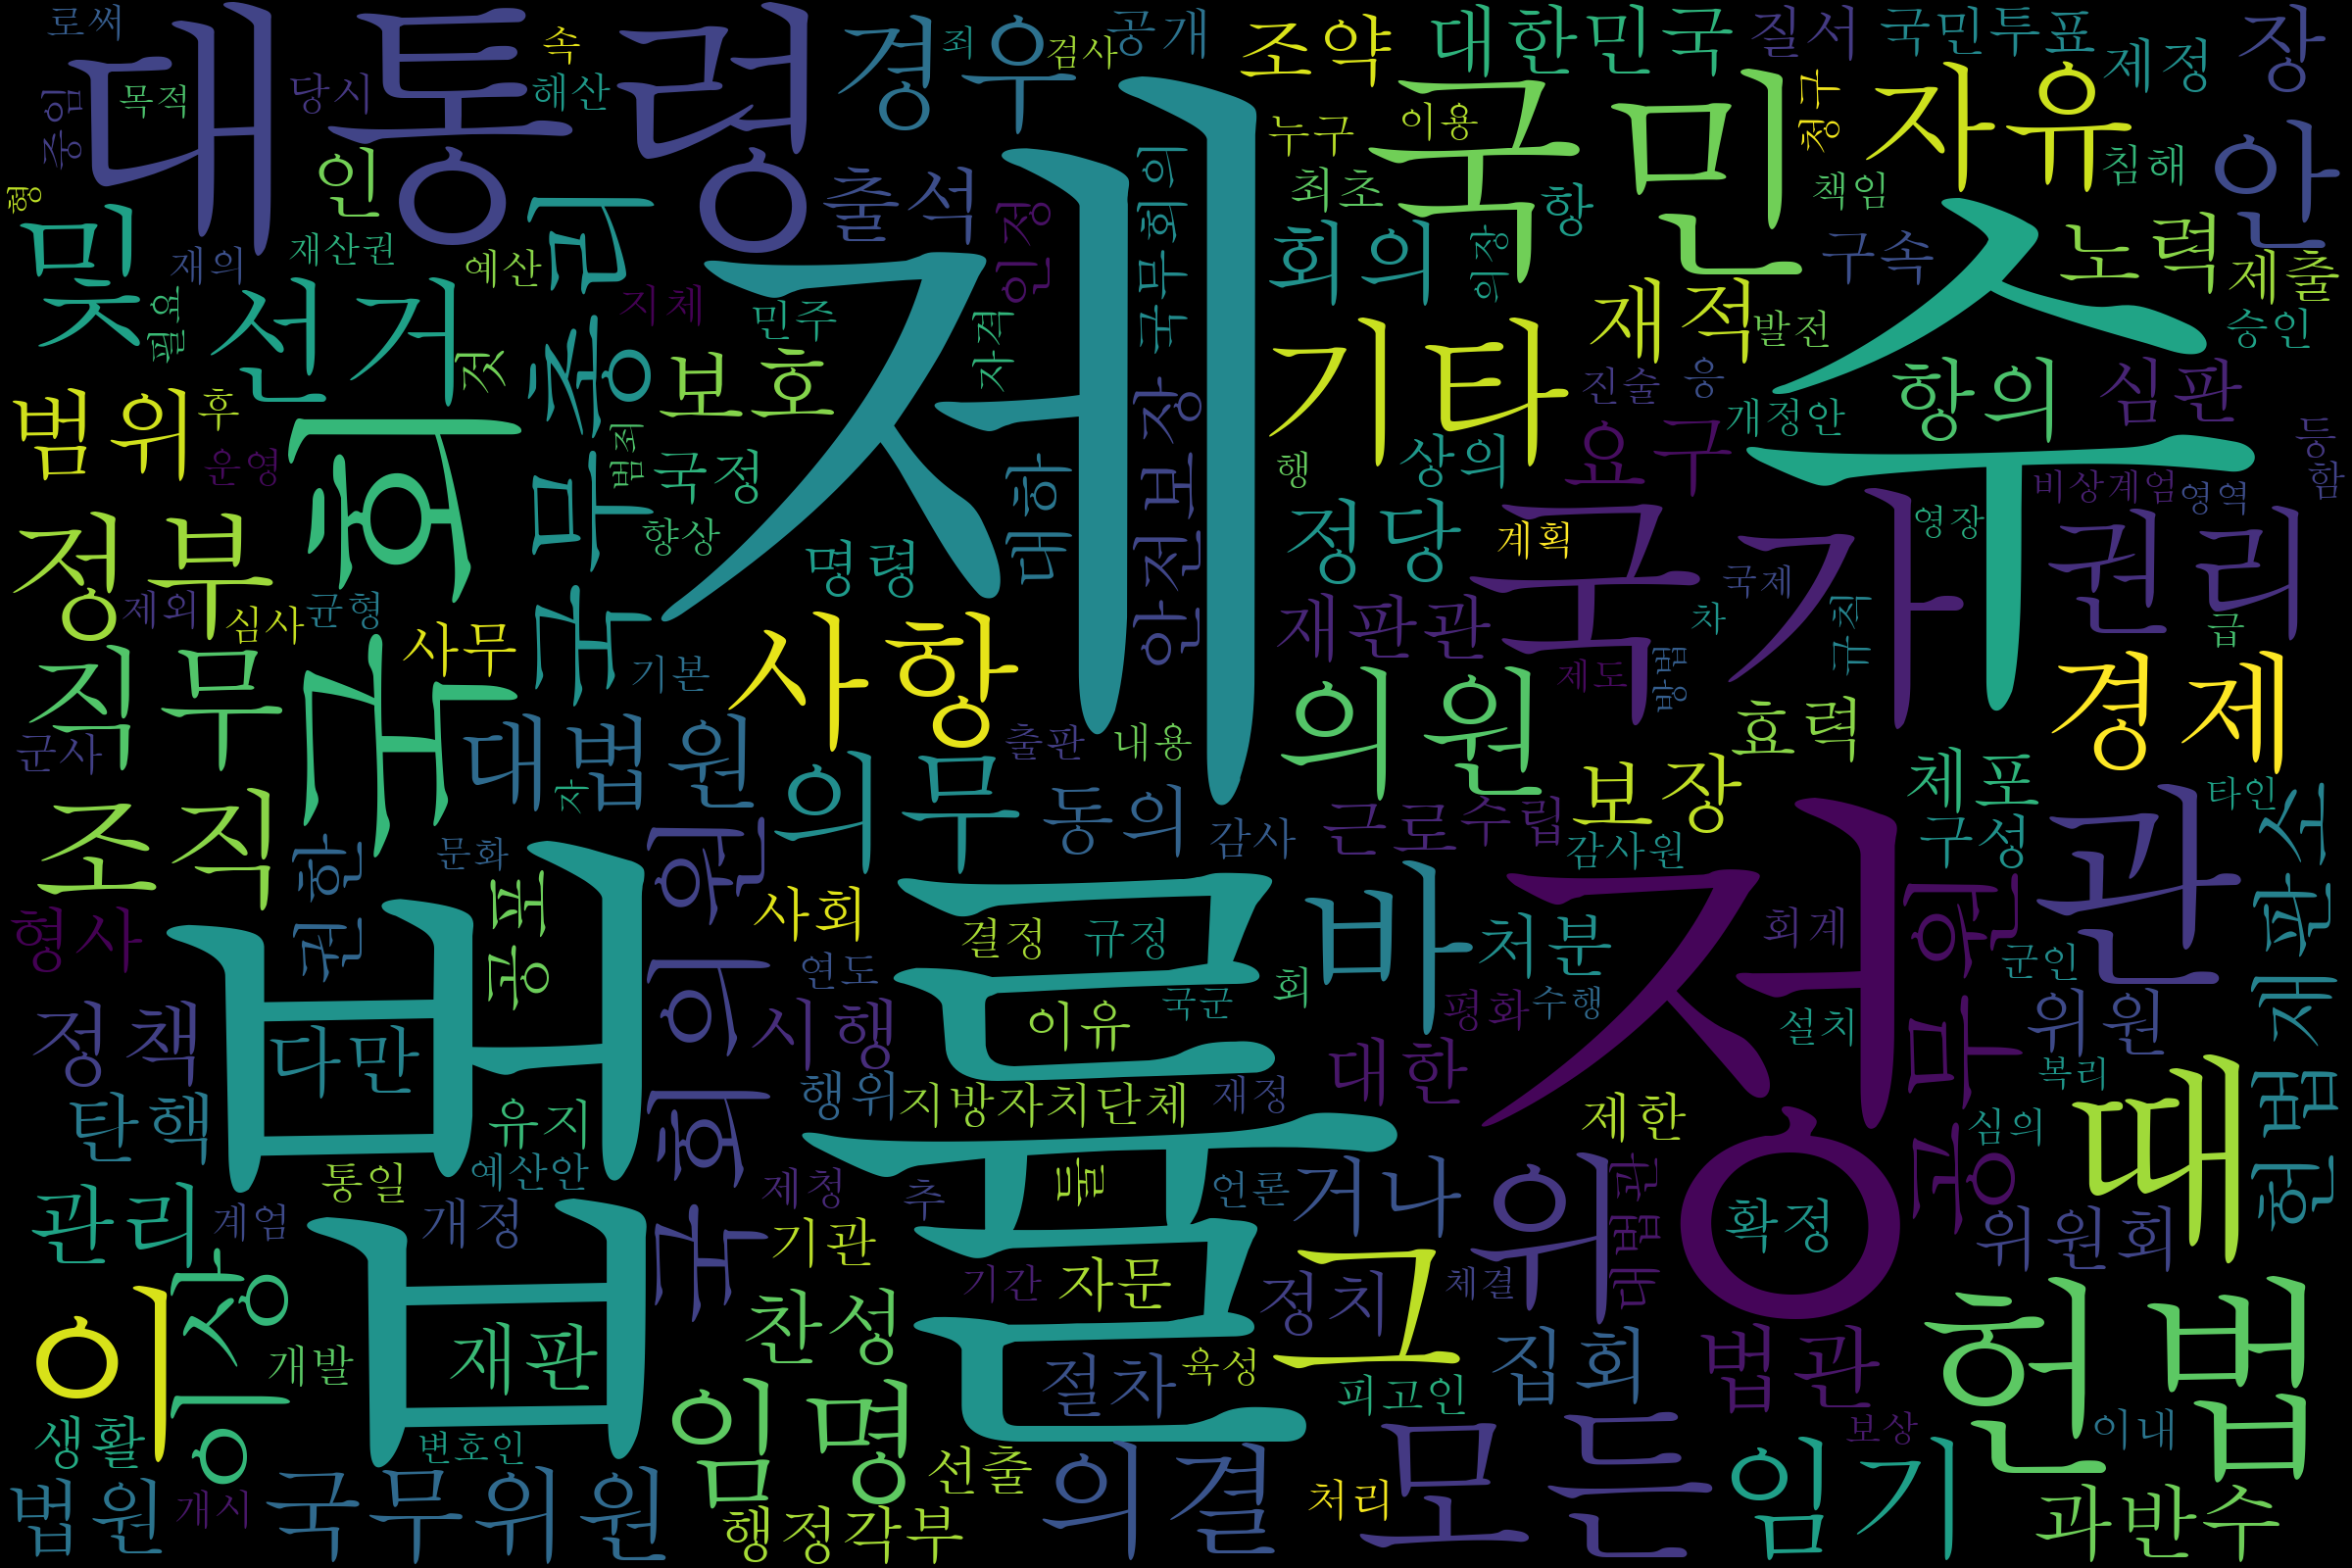

In [19]:
# 워드 클라우드 객체 생성 -> 한글은 폰트파일의 경로를 ㅣ지정해야함
wc = WordCloud(font_path="./wordcloud/batang.ttc", width=1200,height=800,scale=2.0)

## 직접 생성한 빈도수를 이용해서 워드클라우드를 만든다
wc = wc.generate_from_frequencies(count)
wc.to_file("대한민국헌법-주요단어.png")
display(Image(filename='대한민국헌법-주요단어.png'))